In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data_path = r"C:\Users\samer\OneDrive\Desktop\ict\۲۰۲۶\لب\LAB 1\parkinsons_updrs_av.csv"
data = pd.read_csv(data_path)

In [3]:
data['test_time'] = data['test_time'].astype('int64')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       990 non-null    int64  
 1   age            990 non-null    int64  
 2   sex            990 non-null    int64  
 3   test_time      990 non-null    int64  
 4   motor_UPDRS    990 non-null    float64
 5   total_UPDRS    990 non-null    float64
 6   Jitter(%)      990 non-null    float64
 7   Jitter(Abs)    990 non-null    float64
 8   Jitter:RAP     990 non-null    float64
 9   Jitter:PPQ5    990 non-null    float64
 10  Jitter:DDP     990 non-null    float64
 11  Shimmer        990 non-null    float64
 12  Shimmer(dB)    990 non-null    float64
 13  Shimmer:APQ3   990 non-null    float64
 14  Shimmer:APQ5   990 non-null    float64
 15  Shimmer:APQ11  990 non-null    float64
 16  Shimmer:DDA    990 non-null    float64
 17  NHR            990 non-null    float64
 18  HNR       

In [5]:
# selecting features

features = ['sex',
 'test_time',
 'motor_UPDRS',
 'Jitter(%)',
 'Jitter(Abs)',
 'Jitter:RAP',
 'Jitter:PPQ5',
 'Jitter:DDP',
 'Shimmer',
 'Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:APQ11',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'PPE', 'total_UPDRS'
]

In [6]:
df = data[features] 

In [7]:
# seperating train, test, validation sets

df_len = df.shape[0]         #total number of rows in dataset
len_train = int(0.5*df_len)  #number of rows for train set 50% of total dataset
len_tv = int(0.25*df_len)    #number of validation and test are 25% of total

df_train = df[:len_train]    #creates train set
df_test = df[len_train:len_train+len_tv]  #create test set
df_val = df[len_train+len_tv:]            #create validation set

In [8]:
# shuffling train set

Np, Nc = df_train.shape #Np is patients and Nc is feature

np.random.seed(328272)
indexsh = np.arange(Np)
np.random.shuffle(indexsh)
X_train_shuff = df_train.copy(deep=True)
X_train_shuff=X_train_shuff.set_axis(axis=0,labels=indexsh)
X_train_shuff.sort_index(axis=0)

,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS
0,0,157,15.427000,0.005850,0.000053,0.002870,0.002847,0.008615,0.023628,0.232333,0.011968,0.013460,0.017343,0.035905,0.029725,23.541000,0.582540,0.621298,0.222045,21.056000
1,1,85,18.930000,0.007525,0.000036,0.004127,0.004193,0.012378,0.034272,0.335667,0.016432,0.019902,0.024613,0.049295,0.057278,21.066000,0.490403,0.627612,0.241408,24.930000
2,0,47,29.682000,0.005818,0.000030,0.002848,0.002922,0.008545,0.027178,0.283333,0.013852,0.014953,0.020995,0.041552,0.029464,23.689333,0.457613,0.541127,0.232875,37.363500
3,0,114,17.510000,0.004358,0.000034,0.001813,0.002258,0.005435,0.052953,0.490333,0.029003,0.031655,0.042072,0.087013,0.023484,20.351167,0.637228,0.618755,0.180030,26.510000
4,0,137,10.949000,0.007275,0.000062,0.003773,0.003922,0.011325,0.030532,0.275000,0.016127,0.019043,0.024178,0.048375,0.015738,21.752167,0.475502,0.785838,0.244927,16.475000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0,140,18.234000,0.003352,0.000024,0.001500,0.001720,0.004497,0.018532,0.167000,0.008900,0.010487,0.016308,0.026705,0.009821,25.766333,0.410093,0.611733,0.140628,23.100833
491,0,46,11.305000,0.005164,0.000042,0.002582,0.002736,0.007744,0.025832,0.236600,0.013550,0.015454,0.020040,0.040642,0.012283,23.115200,0.469724,0.781834,0.192650,17.305000
492,1,13,20.308333,0.003173,0.000014,0.001718,0.001625,0.005157,0.017760,0.164333,0.009308,0.010173,0.012467,0.027920,0.008031,26.318000,0.537742,0.592597,0.104638,26.308333
493,0,102,10.115000,0.006125,0.000047,0.003140,0.003457,0.009417,0.032017,0.316667,0.016753,0.019412,0.025673,0.050262,0.017111,22.746833,0.507995,0.740003,0.240803,16.057000


In [9]:
# normalizing the train, test, validation set

df_train_mean = df_train.mean()
df_train_std = df_train.std()
df_train_norm = (df_train-df_train_mean)/df_train_std    #normalize train dataset

df_test_mean = df_test.mean()                            #normalize test dataset
df_test_std = df_test.std()
df_test_norm = (df_test-df_test_mean)/df_test_std

df_val_mean = df_val.mean()                              #normalize val dataset
df_val_std = df_val.std()
df_val_norm = (df_val-df_val_mean)/df_val_std

In [10]:
# seperating features and label for train, test and validation sets (except total_UDPRS)

X_train_norm = df_train_norm.loc[:, df_train_norm.columns != 'total_UPDRS']
y_train_norm = df_train_norm['total_UPDRS']

X_test_norm = df_test_norm.loc[:, df_test_norm.columns != 'total_UPDRS']
y_test_norm = df_test_norm['total_UPDRS']

X_val_norm = df_val_norm.loc[:, df_val_norm.columns != 'total_UPDRS']
y_val_norm = df_val_norm['total_UPDRS']

In [11]:
print(len(X_val_norm)) # uses for lenth of x_val_norm in pandas library

248


# Goal

* $ \theta=1 \\ r^2=100 \\ \sigma_\nu^2=0.001 $

* $ R_{Y,N}(n, k) = \theta \exp \left( - \frac{\|x_n - x_k\|^2}{2r^2} \right) + \sigma^2_\nu \delta_{n,k}, \quad n, k \in [1, N] $
* $ R_{Y,N} = \begin{bmatrix}
R_{Y,N-1} & k \\
k^T & d
\end{bmatrix}
$
* $ \mu = \hat{y}_N = k^T R_{Y,N-1}^{-1} y $
* $ \sigma^2 = d - k^T R_{Y,N-1}^{-1} k $

* total_UPDRS is the label/y/regressand

In [12]:
# turning DataFrames into numpy arrays

X_train = X_train_norm.to_numpy()  # we need to convert matrixes to numpy for better and faster numerical evalutaion
y_train = y_train_norm.to_numpy()

X_test = X_test_norm.to_numpy()
y_test = y_test_norm.to_numpy()

X_val = X_val_norm.to_numpy()
y_val = y_val_norm.to_numpy()

In [13]:
X_val.shape  # uses for lenth of x_val_norm in numpy library

(248, 19)

In [14]:
def dist(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2)) #calculate the distances between points 

# will return an array of N-1 closest rows from array X_train and the p1 as the Nth row
def point_N_neighbors(p1, arr, arr_y, N): #این فانکشن n-1 نزدیکترین همسایه های یک نقطه را پیدا می کند
    list_of_dist_p = list()   #we define some empty lists to store datas
    points = list()
    y_points = list()
    for i, p in enumerate(arr):
        list_of_dist_p.append((dist(p1, p), i))  #store distances between points in arr_y
    for d_i in sorted(list_of_dist_p)[:N-1]:  
        points.append(arr[d_i[1], :])
        y_points.append(arr_y[d_i[1]])
    points.append(p1)
    return np.stack(points, axis=0), np.array(y_points)

# cov matrix, eqn(1)
# it's RBF kernel plus a kronecker delta term, works like a cov (it is a similarity metric, similar to  what cov computes, similarity of two RVs)
def cov_matrix(X, theta, r2, s2):
    N = X.shape[0]
    R = np.zeros((N, N))

    for n in range(N):  #we need 2 loops because we have to find covariance matrix all items 
        for k in range(N):
            exp = np.exp(-(np.linalg.norm(X[n] - X[k])**2) / (2*r2))        #first part of formula
            delta_nk = 1 if n == k else 0                                   #if n == k kroneker is 0 
            R[n, k] = (theta * exp) + (s2*delta_nk)                         #creating matrix
    return R

# decomposition in the form of R_N-1, K, K_transpose, d    
def decom(mat, N):                                                          #we use it for creating a covariance matrix Y,N
    R_N1 = mat[:N-1, :N-1]                                                  #all the rows and columns exept last one
    K = mat[:N-1, N-1]                                                      #last column instead of last row
    d = mat[N-1, N-1]                                                       #last row in the last column is d
    return R_N1, K, K.T, d


def mse(y_true, y_hat):                                                     #evaluate mean square error for y 
    return np.mean(np.square((y_true-y_hat)))

In [15]:
# calculating the Xr's for saving time on each iteration!

In [16]:
N = 10      #number of nearest neighbors to find including the point itself
Xr_mat = np.zeros((X_val.shape[0], N, X_val.shape[1]))       
yr_mat = np.zeros((y_val.shape[0], N-1)) 
for i, x in enumerate(X_val):
    Xr_mat[i], yr_mat[i] = point_N_neighbors(x, X_train, y_train, N)  #Xr_mat stores N*N matrix and Yr_mat stores means(miu)

In [17]:
yr_mat.shape

(248, 9)

In [18]:
def g_regression(theta=1, r2=100, s2=0.001, N=10):

    y_hat_mat = np.zeros(y_val.shape) 
    sigma_mat = np.zeros(y_val.shape)

    for k in range(X_val.shape[0]):
        x = X_val[k, :]

        # generating y_hat corresponding to x
        # Xr, yr = point_N_neighbors(x, X_train, y_train, N)
        Xr = Xr_mat[k]
        yr = yr_mat[k]
        
        R_N = cov_matrix(Xr, theta, r2, s2)  #getting the covariance matrix with specified hyperparameters
        R_N1, K, K_T, d = decom(R_N, N)         

        mu = K_T@np.linalg.inv(R_N1)@yr
        sigma2 = d - K_T@np.linalg.inv(R_N1)@K
        
        y_hat = mu
        y_hat_mat[k] = y_hat
        sigma_mat[k] = sigma2
    
    return y_hat_mat, sigma_mat

In [19]:
%%time
y_hat_mat, sigma_mat = g_regression(theta=0.1, r2=75, s2=0.001)

CPU times: total: 62.5 ms
Wall time: 79.6 ms


In [20]:
display(y_val, y_hat_mat) #tedade N=10

array([-0.95370629, -0.91950775, -0.88474113, -0.85008813, -0.81577597,
       -0.78100935, -0.74635635, -0.71191164, -0.67727757, -0.64251095,
       -0.53912003, -0.50435341, -0.46977615, -0.46685999, -0.46685999,
       -0.46685999, -0.46685999, -0.46685999, -0.46685999, -0.46685999,
       -0.46685999, -0.46685999, -0.22307706, -0.25598795, -0.29245881,
       -0.32745266, -0.36221928, -0.3976676 , -0.43254784, -0.46765531,
       -0.50264916, -0.52844008, -0.57252325, -0.60746029, -0.6421701 ,
       -0.67705034, -0.67205122, -0.62796805, -0.58456659, -0.54004789,
       -0.4971577 , -0.45356687, -0.40891563, -0.36562778, -0.32222631,
       -0.27802953, -0.23462806, -0.19145383, -0.14680258,  2.04099491,
        2.0500615 ,  2.05905992,  2.06814923,  2.07712492,  2.08621424,
        2.09553078,  2.10427924,  2.11325494,  2.12234425,  2.13131995,
        2.14040926,  2.14540838,  2.11530004,  2.10234777,  2.08905465,
        2.07530706,  2.06292287,  2.04974337,  2.03656387,  2.02

array([-0.06603779,  0.01494412, -0.07136901, -0.11331873, -0.19501127,
        0.30009597, -0.1235591 , -0.39208238,  0.10609986,  0.25085291,
       -0.10096093,  0.00644689,  0.01016876,  0.29702967,  0.32474723,
        0.19054496,  0.10307356,  0.24513944,  0.37434115,  0.12803004,
        0.45671642,  0.12873521,  0.02023349, -0.43700391, -0.55037057,
       -0.50614197, -0.38118772, -0.38723874, -0.55069138, -0.24025995,
       -0.23233265, -0.6551192 , -0.43770204, -0.40364725, -0.66766076,
       -0.82490106, -0.77892508, -0.58080732, -0.38924376, -0.278337  ,
       -0.41360541, -0.61138797, -0.52207231, -0.66669344, -0.64626876,
       -0.62210621, -0.50211155, -0.54127269, -0.59550096, -0.05511444,
        1.39620211,  1.39676333,  0.5298956 ,  0.59355528,  0.52157227,
        0.86465008,  0.25537726,  0.56742345,  1.05972355,  0.28674616,
        0.34492185,  0.83546165,  1.80735615,  0.94517426,  1.68272025,
        1.31870514,  1.72519159,  0.97927294,  0.49381778,  0.51

In [21]:
mse(y_val, y_hat_mat)

np.float64(0.3098520070224313)

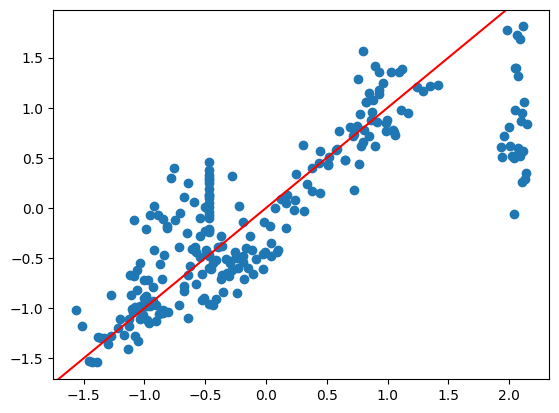

In [22]:
# verifying that estimated values are almost like the labels
fig, ax = plt.subplots(ncols=1)
plt.scatter(y_val, (y_hat_mat-y_val.mean())/y_val.std())  #normalized the result
ax.axline([0, 0], [1, 1], c='r')
plt.show()

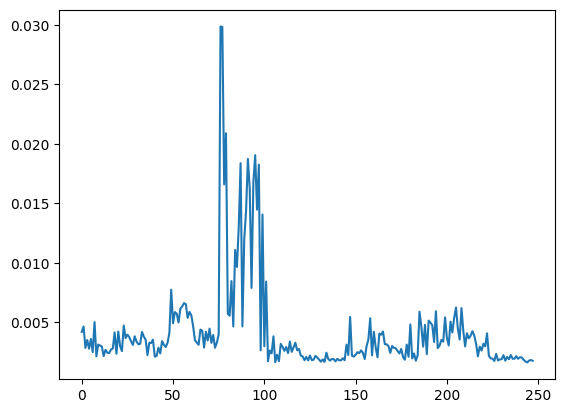

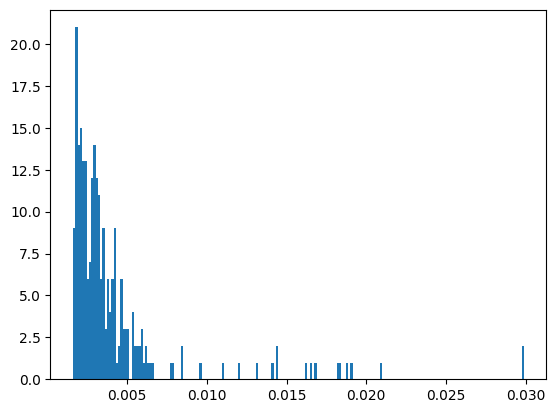

In [23]:
plt.plot(sigma_mat) #it shows the variance base of samples(at a specified time)
plt.show()
plt.hist(sigma_mat, bins=200)  #sigmas are positive so we have the half of bell #we can use a large bins because of large datas
plt.show()

# Hyperparameters

* $θ$ = 1 is correct
* $r^2$ and $\sigma_\nu^2$ to be set so that MSE i.e. $(y_{val} - \hat{y})^2$ is minimized.
* Equivalently we can minimize the mean square value of normalized matrices.

In [24]:
mse(y_val, y_hat_mat)

np.float64(0.3098520070224313)

In [25]:
# for r2, since it is squared, we can use a range from 1 to 25 with a step of 5 to see how it effects the result
# generally it is the length factor and is working like a memory factor in our system, the higher it is, the more we capture and more smoothly we capture
# also the 100 seems unreasonably high, so we chose a lower number for the higher bound of r2
'''https://stats.stackexchange.com/questions/445484/does-length-scale-of-the-kernel-in-gaussian-process-directly-relates-to-correlat#:~:text=where,called'''

# for s2, we have that value used only on diagonal of the cov/kernel matrix, for that reason it is only shifting up or down the diagonal cov
# since we are using a RBF kernel and it's main diagonal is always 1, and because s2 is always positive, the final effect would be on the
# diagonal and it would be in the form of 1 + s2. so a reasonable range for that would be somewhere near zero to near 1, like (0, 1) with step of 0.05

# using these values for r2 and s2 we should caculate the regression 20x20 times, which is 400 times!
# the time cost of one executiion of the regression is around 35 seconds, and 400x35 seconds is around 4 hours!!
# so lets first test r2 in the range of (1, 25, 5) and s2 in the range of (0, 1, 0.1), these cost us 5x10x35 seconds which is 1/4 of the initial ranges

# susequently, we can store the x_val points distance from the X_train and don't recalculate them again and again and save time, it's not dependant on r2 and s2
# doing that we mitigate the time for each time executing the regression to 2 seconds, now we can do higher resolution for r2 and s2  

'https://stats.stackexchange.com/questions/445484/does-length-scale-of-the-kernel-in-gaussian-process-directly-relates-to-correlat#:~:text=where,called'

### first serach

In [26]:
r2_range = [x for x in range(50, 202, 10)]  #large steps= mesh grid process is faster  
s2_range = [x for x in np.arange(0, 1, 0.1)] 

In [27]:
print('r2_range:',len(r2_range))
print('s2_range:',len(s2_range))

r2_range: 16
s2_range: 10


In [28]:
display(r2_range, s2_range)

[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

[np.float64(0.0),
 np.float64(0.1),
 np.float64(0.2),
 np.float64(0.30000000000000004),
 np.float64(0.4),
 np.float64(0.5),
 np.float64(0.6000000000000001),
 np.float64(0.7000000000000001),
 np.float64(0.8),
 np.float64(0.9)]

In [29]:
grid_results = list() 
for r2 in r2_range:   #Grid search
    for s2 in s2_range:
        # print(f'calculating for: r2={r2} and s2={s2}')
        y_hat_mat = g_regression(r2=r2, s2=s2)
        mse_val = mse(y_val, y_hat_mat)
        print(f'calculation for: r2 = {r2} and s2 = {s2} ===> mse = {mse_val}')
        grid_results.append((r2, s2, mse_val))

calculation for: r2 = 50 and s2 = 0.0 ===> mse = 0.638262108565671
calculation for: r2 = 50 and s2 = 0.1 ===> mse = 0.6986368928345758
calculation for: r2 = 50 and s2 = 0.2 ===> mse = 0.7350660242968489
calculation for: r2 = 50 and s2 = 0.30000000000000004 ===> mse = 0.7789706666225116
calculation for: r2 = 50 and s2 = 0.4 ===> mse = 0.8329642878436977
calculation for: r2 = 50 and s2 = 0.5 ===> mse = 0.897886513060927
calculation for: r2 = 50 and s2 = 0.6000000000000001 ===> mse = 0.9740862727653539
calculation for: r2 = 50 and s2 = 0.7000000000000001 ===> mse = 1.0617220442917514
calculation for: r2 = 50 and s2 = 0.8 ===> mse = 1.1608638126229405
calculation for: r2 = 50 and s2 = 0.9 ===> mse = 1.2715356748152775
calculation for: r2 = 60 and s2 = 0.0 ===> mse = 0.6355134011504183
calculation for: r2 = 60 and s2 = 0.1 ===> mse = 0.6985628657675721
calculation for: r2 = 60 and s2 = 0.2 ===> mse = 0.7339284112178026
calculation for: r2 = 60 and s2 = 0.30000000000000004 ===> mse = 0.77662

In [30]:
results = np.array(grid_results)

In [31]:
results.shape

(160, 3)

C:\Users\samer\AppData\Local\Temp\ipykernel_17396\345279848.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('coolwarm')


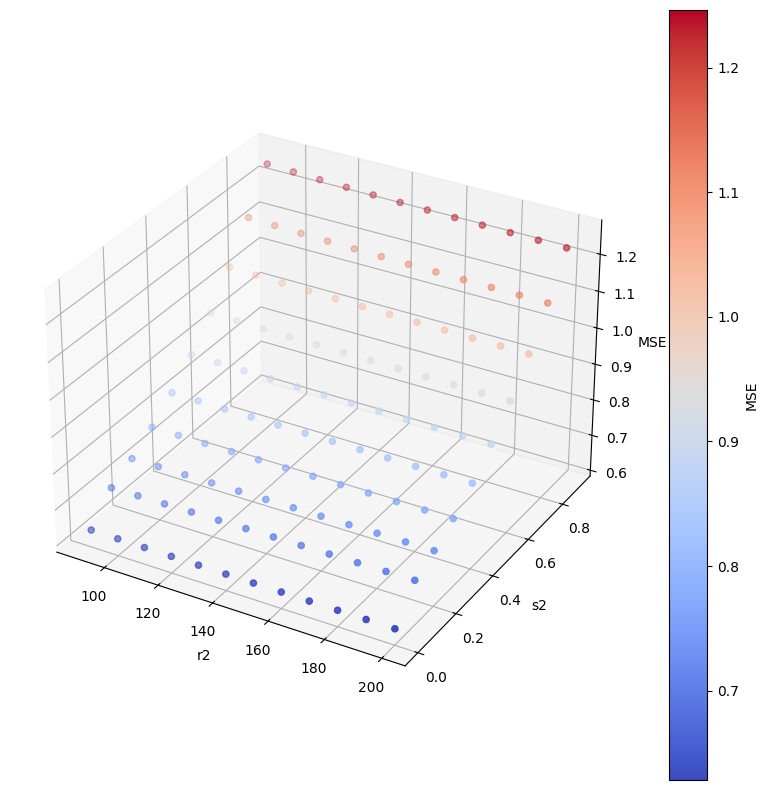

In [32]:
# the first values for r2 is too small and the mse values are unreasonably high, so let's say we don't plot the first 40 of them!
x = results[40:, 0] #we start from row number 40
y = results[40:, 1]
z = results[40:, 2]

# Define colors based on the 'mse' values
colors = np.array(z)
colormap = plt.cm.get_cmap('coolwarm') 

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(x, y, z, c=colors, cmap=colormap)
ax.set_xlabel('r2')
ax.set_ylabel('s2')
ax.set_zlabel('MSE')

cbar = plt.colorbar(sc)
cbar.set_label('MSE')

plt.show()

### second search

In [33]:
# it seems that the higher values for r2 and the lower values for s2 is corresponding to smaller values for MSE
# so we can search for better values for hyperparameters using this knowledge to further mitigate the value for MSE with higher resolution as well

new_r2_range = [x for x in range(190, 210, 2)]
new_s2_range = [x for x in np.arange(0, 0.1, 0.005)] #we try with fewer s2 s

In [34]:
print('r2_range:',len(r2_range))
print('s2_range:',len(s2_range))
display(new_r2_range, new_s2_range)


r2_range: 16
s2_range: 10


[190, 192, 194, 196, 198, 200, 202, 204, 206, 208]

[np.float64(0.0),
 np.float64(0.005),
 np.float64(0.01),
 np.float64(0.015),
 np.float64(0.02),
 np.float64(0.025),
 np.float64(0.03),
 np.float64(0.035),
 np.float64(0.04),
 np.float64(0.045),
 np.float64(0.05),
 np.float64(0.055),
 np.float64(0.06),
 np.float64(0.065),
 np.float64(0.07),
 np.float64(0.075),
 np.float64(0.08),
 np.float64(0.085),
 np.float64(0.09),
 np.float64(0.095)]

In [35]:
better_grid_results = list()
for r2 in new_r2_range:
    for s2 in new_s2_range:
        # print(f'calculating for: r2={r2} and s2={s2}')
        y_hat_mat = g_regression(r2=r2, s2=s2)
        mse_val = mse(y_val, y_hat_mat)
        print(f'calculation for: r2 = {r2} and s2 = {s2} ===> mse = {mse_val}')
        better_grid_results.append((r2, s2, mse_val))

calculation for: r2 = 190 and s2 = 0.0 ===> mse = 0.6284611225799325
calculation for: r2 = 190 and s2 = 0.005 ===> mse = 0.6549559814611509
calculation for: r2 = 190 and s2 = 0.01 ===> mse = 0.6640689912793671
calculation for: r2 = 190 and s2 = 0.015 ===> mse = 0.6701338880318056
calculation for: r2 = 190 and s2 = 0.02 ===> mse = 0.6747386563644568
calculation for: r2 = 190 and s2 = 0.025 ===> mse = 0.6784696298851461
calculation for: r2 = 190 and s2 = 0.03 ===> mse = 0.6816215913683095
calculation for: r2 = 190 and s2 = 0.035 ===> mse = 0.6843655177206885
calculation for: r2 = 190 and s2 = 0.04 ===> mse = 0.6868096504713902
calculation for: r2 = 190 and s2 = 0.045 ===> mse = 0.6890268434196795
calculation for: r2 = 190 and s2 = 0.05 ===> mse = 0.6910684447923342
calculation for: r2 = 190 and s2 = 0.055 ===> mse = 0.692971981702068
calculation for: r2 = 190 and s2 = 0.06 ===> mse = 0.6947656985006193
calculation for: r2 = 190 and s2 = 0.065 ===> mse = 0.6964713771561646
calculation for

In [36]:
better_results = np.array(better_grid_results)

C:\Users\samer\AppData\Local\Temp\ipykernel_17396\2105018369.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('coolwarm')


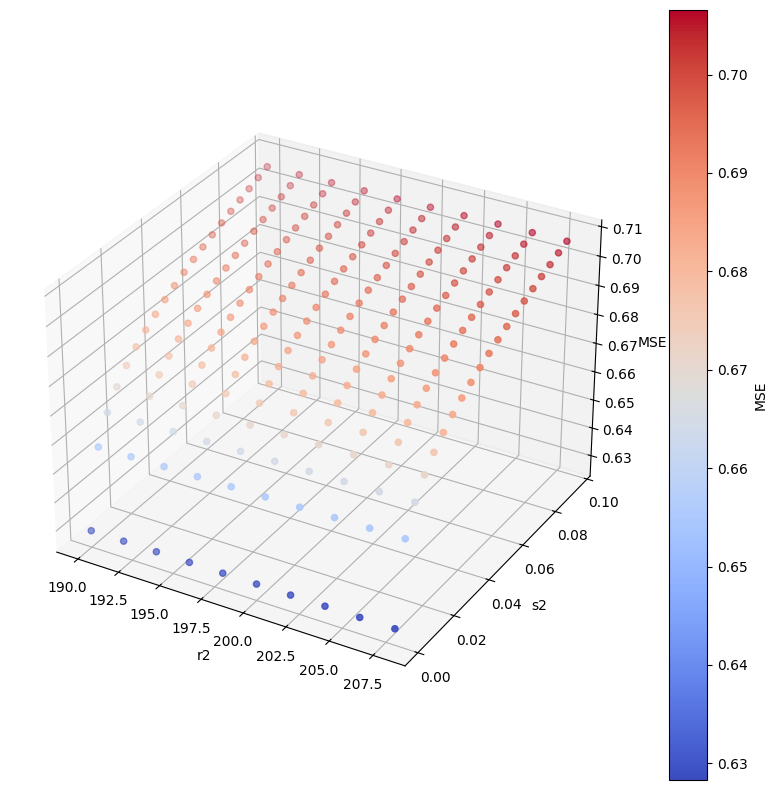

In [37]:
x = better_results[:, 0]  #we define 3 lists for r2,s2 and mse to plot it a 3D plot, first column for r2,second for s2 and third for mse
y = better_results[:, 1]  #
z = better_results[:, 2]

# Define colors based on the 'mse' values
colors = np.array(z)
colormap = plt.cm.get_cmap('coolwarm')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(x, y, z, c=colors, cmap=colormap)
ax.set_xlabel('r2')
ax.set_ylabel('s2')
ax.set_zlabel('MSE')

cbar = plt.colorbar(sc)
cbar.set_label('MSE')

plt.show()

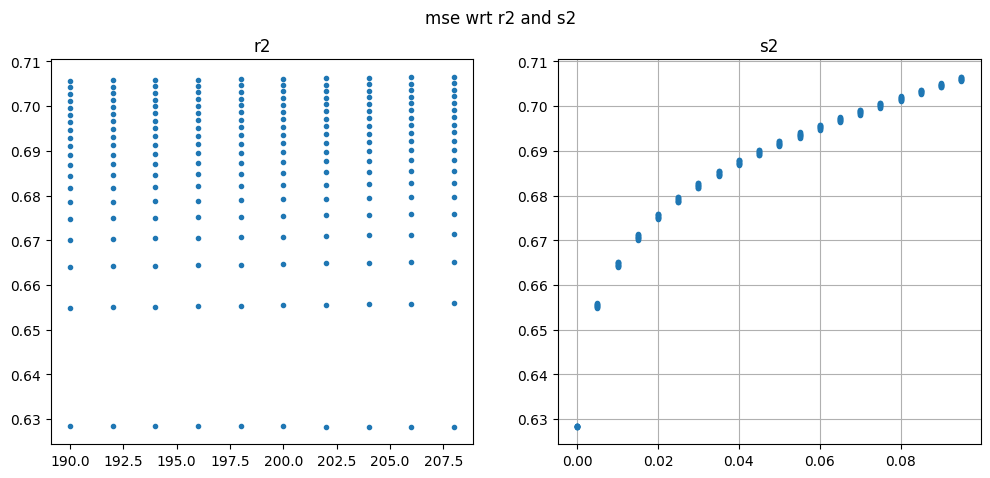

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('mse wrt r2 and s2')
ax1.plot(x, z, '.')
ax1.set_title('r2')
plt.plot(y, z, '.')
ax2.set_title('s2')
plt.grid()
plt.show()

In [39]:
# so now we are sure that the s2 is somewhere in the range of 0.005 and 0.015 probably
# and we can see the trend in r2 is when we increase it, the mse decreases, maybe it is not a good idea to just increase it
# maybe it's a case of overfitting with increasing r2, so lets fix that on some reasonable number and not just increase it recurrently

In [40]:
y_mat_hat = g_regression(r2=500000, s2=0.001)

In [41]:
mse(y_val, y_mat_hat)

np.float64(0.7210829871176038)

### third search (final)

In [42]:
r2 = 100
final_s2_range = [x for x in np.arange(0.005, 0.018, 0.0005)]

In [43]:
# final_s2_range

In [44]:
final_grid_search = list()
for s2 in final_s2_range:
    y_hat_mat = g_regression(r2=r2, s2=s2)
    mse_val = mse(y_val, y_hat_mat)
    print(f'calculation for: r2 = {r2} and s2 = {s2} ===> mse = {mse_val}')
    final_grid_search.append((r2, s2, mse_val))

calculation for: r2 = 100 and s2 = 0.005 ===> mse = 0.6501090763799635
calculation for: r2 = 100 and s2 = 0.0055 ===> mse = 0.6510875904958389
calculation for: r2 = 100 and s2 = 0.005999999999999999 ===> mse = 0.6520016898414682
calculation for: r2 = 100 and s2 = 0.006499999999999999 ===> mse = 0.6528610012160287
calculation for: r2 = 100 and s2 = 0.006999999999999998 ===> mse = 0.6536731272621848
calculation for: r2 = 100 and s2 = 0.007499999999999998 ===> mse = 0.6544441603989535
calculation for: r2 = 100 and s2 = 0.007999999999999997 ===> mse = 0.6551790485149928
calculation for: r2 = 100 and s2 = 0.008499999999999997 ===> mse = 0.6558818595350351
calculation for: r2 = 100 and s2 = 0.008999999999999998 ===> mse = 0.6565559757892092
calculation for: r2 = 100 and s2 = 0.009499999999999996 ===> mse = 0.6572042388558901
calculation for: r2 = 100 and s2 = 0.009999999999999995 ===> mse = 0.6578290589285091
calculation for: r2 = 100 and s2 = 0.010499999999999995 ===> mse = 0.65843249841040

###

In [45]:
# we got the optimal s2 = 0.01449 ~ 0.0145

* we can set $\sigma_{\nu}^2 = 0.0145$
* we know that larger number for $ r^2 $ is better but we don't know how big, it depends on the amount of correlation we are trying to get.
* $ r^2 = 100 $

### changing N

In [46]:
# now we can change the number of smaples N
# we can change it in the range of 5 through 50 with step size of 10 and see the result of MSE

In [47]:
r2 = 100
s2 = 0.0174

n_mse_results = list()

for N in range(5, 60, 10):
    yr_mat = np.zeros((y_val.shape[0], N-1))
    Xr_mat = np.zeros((X_val.shape[0], N, X_val.shape[1]))
    for i, x in enumerate(X_val):
        # Ensure that all required arguments are provided to point_N_neighbors function
        Xr_mat[i], yr_mat[i] = point_N_neighbors(x, X_train, y_train, N)

    y_mat_hat = g_regression(r2=r2, s2=s2, N=N)
    mse_value = mse(y_val, y_mat_hat)
    print(f'for N = {N} ==> MSE = {mse_value}')
    n_mse_results.append((N, mse_value))

for N = 5 ==> MSE = 0.6969288758901155
for N = 15 ==> MSE = 0.6534724821379517
for N = 25 ==> MSE = 0.6291574558034604
for N = 35 ==> MSE = 0.6174655680123448
for N = 45 ==> MSE = 0.6118139135016554
for N = 55 ==> MSE = 0.6084370035635859


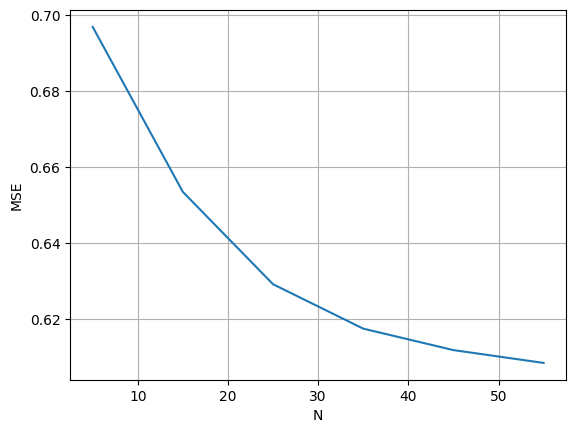

In [48]:
n_mse_results = np.array(n_mse_results)

plt.plot(n_mse_results[:, 0], n_mse_results[:, 1])
plt.xlabel('N')
plt.ylabel('MSE')
plt.grid()
plt.show()

In [49]:
# we can clearly see that with increasing the Number of datapoints, N, the result is not getting better so we can fix that N on 5 or 10